# Exploratory Data Analysis in Python

# What are the key drivers of housing price?


### Kaggle Housing Prices dataset

In [4]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv("data/housing_full.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
pd.read_csv('data/housing_full.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [57]:
na_col = df.isna().sum()
print('Total missing values')
na_col.loc[na_col>0]

Total missing values


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# 1. Univariate Analysis

In [65]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Nunique', 'Dtype',
                                      'Mode', 'Mean','Min','Max','Std','Skew','Kurt'])

    for col in df:
        if df[col].dtype != 'object':
            output_df.loc[col] = [df[col].count(), 
                                  df[col].isnull().sum(), 
                                  df[col].nunique(), 
                                  df[col].dtype, 
                                  df[col].mode().values[0],
                                  df[col].mean(),
                                  df[col].min(),
                                  df[col].max(),
                                  df[col].std(),
                                  df[col].skew(),
                                  df[col].kurt()
                                 ]
        else:
            output_df.loc[col] = [df[col].count(), 
                                  df[col].isnull().sum(), 
                                  df[col].nunique(), 
                                  df[col].dtype,
                                  df[col].mode().values[0],
                                  '-','-','-','-','-','-'
                                 ]
            
    return output_df

In [66]:
unistats_df = unistats(df)
unistats_df.sort_values(by=['Skew', 'Nunique'], ascending=[True, False])

,Count,Missing,Nunique,Dtype,Mode,Mean,Min,Max,Std,Skew,Kurt
GarageYrBlt,1379,81,97,float64,2005.0,1978.506164,1900.0,2010.0,24.689725,-0.649415,-0.418341
YearBuilt,1460,0,112,int64,2006,1971.267808,1872,2010,30.202904,-0.613461,-0.439552
YearRemodAdd,1460,0,61,int64,1950,1984.865753,1950,2010,20.645407,-0.503562,-1.272245
GarageCars,1460,0,5,int64,2,1.767123,0,4,0.747315,-0.342549,0.220998
Id,1460,0,1460,int64,1,730.5,1,1460,421.610009,0.0,-1.2
...,...,...,...,...,...,...,...,...,...,...,...
PoolQC,7,1453,3,object,Gd,-,-,-,-,-,-
Street,1460,0,2,object,Pave,-,-,-,-,-,-
Alley,91,1369,2,object,Grvl,-,-,-,-,-,-
Utilities,1460,0,2,object,AllPub,-,-,-,-,-,-


### Skewness and Kurtosis Problems
MLR assumes data is normal
* `MSSubClass` ranges from 20-190 and is right skewed
* `MiscVal`, `PoolArea`, and `LotArea` are highly skewed so may cause issues in MLR model (may remove)
* `Neighborhood` has 25 unique categoricals so turning them into dummy variables might be too much (may remove)

# 2. Bivariate Statistics
**Using Sales Price as label**
* Numeric to Numeric - Correlation
* Numeric to Categorical - One-Way ANOVA (3+ groups) or t-test (2 groups)
* Categorical to Categorical - Chi-Square


With correlation, it ignores the multicollinearity, the overlap with other variables 

### Drop missing values

In [68]:
df.dropna(axis=1,inplace=True)

In [69]:
from scipy import stats

In [70]:
def bivstats(df, label):
    # Correlation, anova, p-value results dataframe
    corr_df = pd.DataFrame(columns = ['Stat', '+/-', 'Effect size', 'p-value'])


    for col in df:
        if df[col].isna().sum() == 0:
            if df[col].dtype != 'object': # check if column is numerical
                # calculate correlation & p-value
                r, p = stats.pearsonr(df[col], df[label])
                corr_df.loc[col] = ['r', np.sign(r), round(abs(r),3), round(p,4)]

            else: # Else, Perform One-Way ANOVA on the groups
                df1 = df.groupby(col)[label].apply(list)
                f, p = stats.f_oneway(*df1)
                corr_df.loc[col] = ['F', '', round(f,3), round(p,4)]



        else: # If missing values = NaN
            corr_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
            
    return corr_df

In [71]:
bivstat_df = bivstats(df,'SalePrice')

bivstat_df.sort_values(by=['Stat', 'Effect size', 'p-value'], ascending=[True, False,False]).head(50)

,Stat,+/-,Effect size,p-value
ExterQual,F,,443.335,0.0000
KitchenQual,F,,407.806,0.0000
Foundation,F,,100.254,0.0000
CentralAir,F,,98.305,0.0000
HeatingQC,F,,88.394,0.0000
Neighborhood,F,,71.785,0.0000
SaleCondition,F,,45.578,0.0000
MSZoning,F,,43.840,0.0000
PavedDrive,F,,42.024,0.0000
LotShape,F,,40.133,0.0000


### Interpreting Results


**Pearson r**
* `Overall Quality` has the highest effect size of 0.791.
* Could indicate overall quality plays a big role in housing prices

**ANOVA**
* the F-stat indicates the Mean Housing price can be different depending on these qualities
* `Exterior Quality`, `Kitchen Quality` histograms can be visualised to see the differences in prices by these quality

**Insignificant variables to drop**
* `LandSlope` and `Utilities` can be dropped since they are not statistically significant
* same for `YrSold`, `LowQualFinSF`, `MiscVal`, `BsmtHalfBath`, `BsmtFinSF2`.
* These differences happened by chance and are not good predictors for MLR model

# 3. Bivariate Visualisations
**To document the variables that have issues in these assumptions for the Multiple Linear Regression**
1. Are the variables normally distributed?
2. Significance of heteroscedasticity?

When doing MLR predictions, consider dropping variables with these issues (high skewness and high heteroscedasticity), even if the results may look good.


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 50


from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [73]:
def heteroscedascity(df, feature, label):
    model = ols(formula=(label.name + '~' + feature.name), data=df).fit()
    white_test = het_white(model.resid, model.model.exog)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    
    output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
    output_df.loc['White'] = white_test
    output_df.loc['Bre-Pa'] = bp_test
    return output_df.round(3)

In [74]:
def scatter(X, y):
    # Calculate regression line
    m, b, r, p, err = stats.linregress(X, y)

    # Text
    textstr = ('\n'.join((
        'y = ' + str(round(m,2)) + 'x + ' + str(round(b,2)),
        'r2 = ' + str(round(r**2,2)),
        'p = ' + str(round(p,4)),
        str(X.name) + 'Skew = ' + str(round(X.skew(), 2)),
        str(y.name) + 'Skew = ' + str(round(y.skew(), 2)),
        '\n',
        str(heteroscedascity(pd.DataFrame(y).join(pd.DataFrame(X)), X, y))

    )))

    # Plot
    ax = sns.jointplot(x=X, y=y, kind='reg')
    ax.fig.text(1, .15, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show();

In [75]:
def box_plot(df, X, y):
    # Calculate ANOVA oneway results
    df1 = df.groupby(X)[y].apply(list)
    oneway = stats.f_oneway(*df1)

    # Calculate t-tests with Bonferroni correction for p-value threshold
    unique_groups = df[X].unique()
    ttests = []
    
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[X] == group]
                type_2 = df[df[X] == group_2]
                
                # Must have more than 1 observation per group to perform a t-test
                if len(type_1[col]) < 2 or len(type_2[col]) < 2:
                    print("'" + group + "' n: " + str(len(type_1)) + 
                          "; '" + group_2 + "' n: " + str(len(type_2)) + "; no t-test performed")
                t, p = stats.ttest_ind(type_1[y], type_2[y])
                ttests.append([group, group_2, t.round(4), p.round(4)])
                
    if len(ttests) > 0: # 'Avoid divide by 0' error
        p_threshold = 0.05 / len(ttests) # Bonferroni-corrected p-value determined
    else:
        p_threshold = 0.05
    

    # Text
    textstr = ('\n'.join((
        'ANOVA',
        'F: ' + str(oneway[0].round(2)),
        'p-value: ' + str(oneway[1].round(2)),
        'Sig. comparisons (Bonferroni-corrected)',
        '\n'
    )))
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ', p=' + str(ttest[3]) + '\n'

    # Plot
    ax = sns.boxplot(x=df[X], y=df[y])
    ax.text(1, .15, textstr, fontsize=12, transform=plt.gcf().transFigure);
    plt.show()

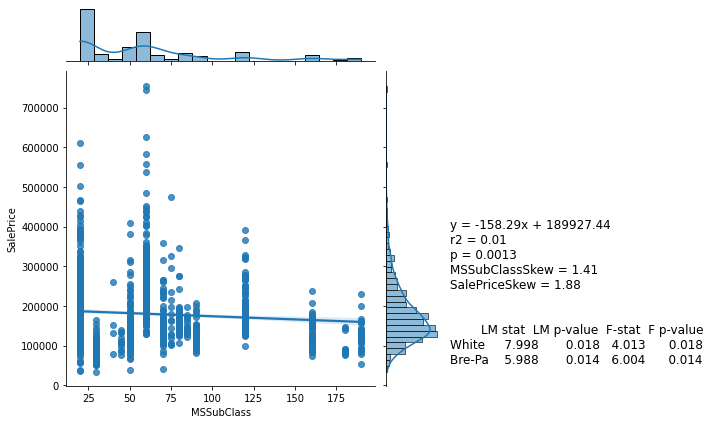

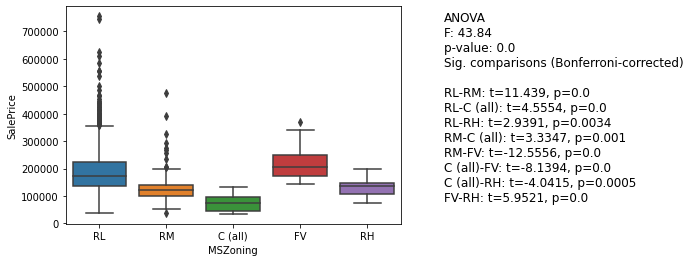

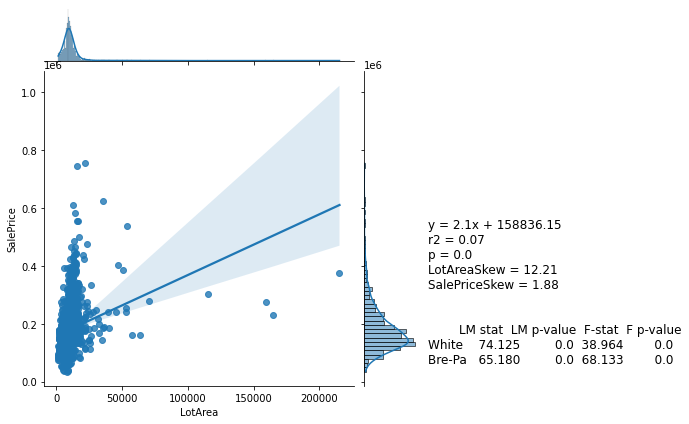

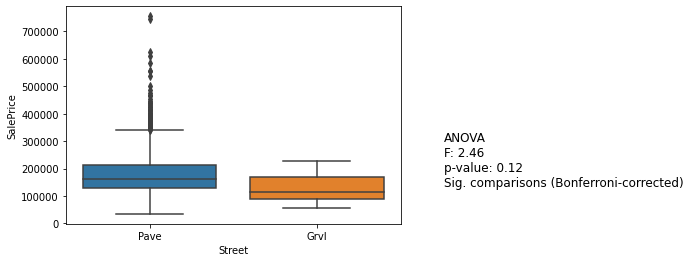

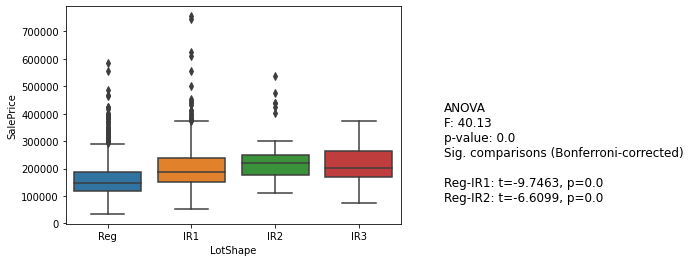

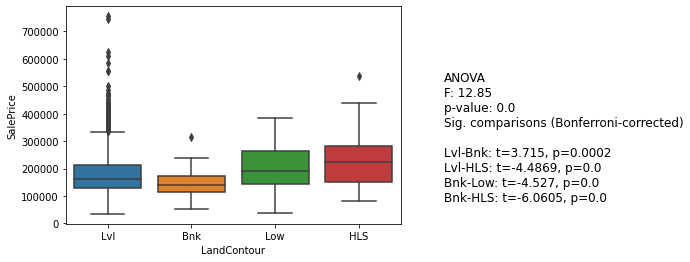

'AllPub' n: 1459; 'NoSeWa' n: 1; no t-test performed


C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


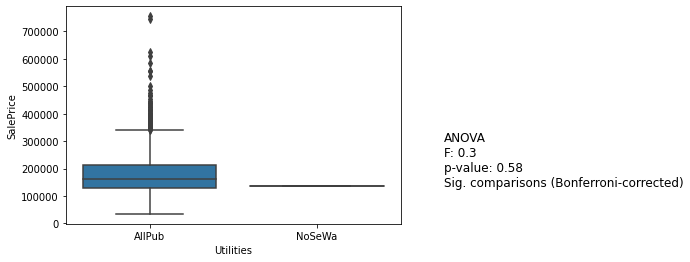

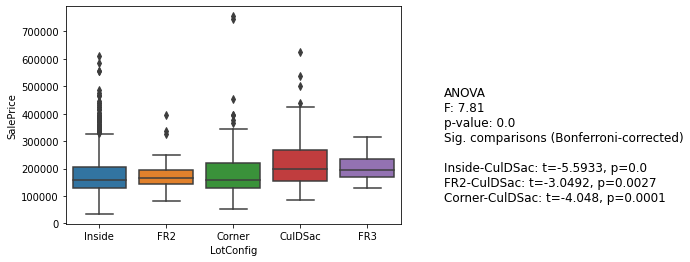

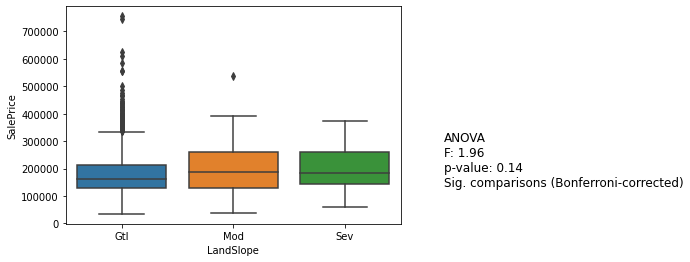

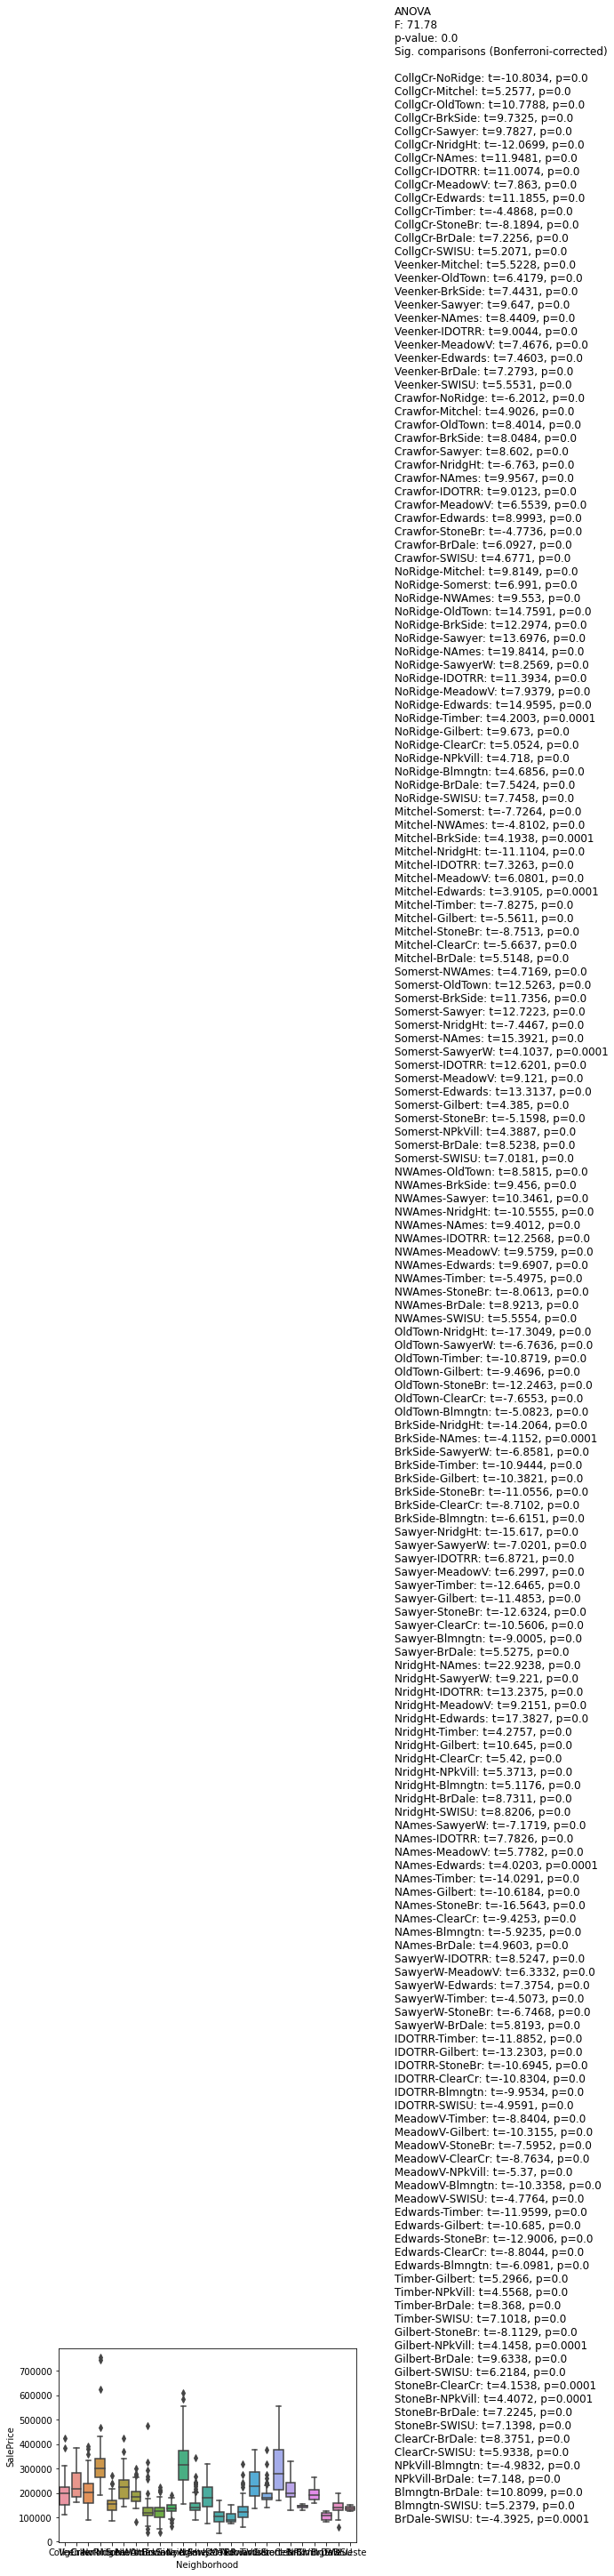

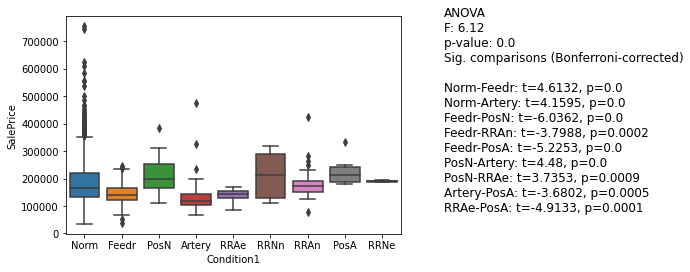

'Norm' n: 1445; 'PosA' n: 1; no t-test performed
'Norm' n: 1445; 'RRAn' n: 1; no t-test performed
'Norm' n: 1445; 'RRAe' n: 1; no t-test performed
'Artery' n: 2; 'PosA' n: 1; no t-test performed
'Artery' n: 2; 'RRAn' n: 1; no t-test performed
'Artery' n: 2; 'RRAe' n: 1; no t-test performed
'RRNn' n: 2; 'PosA' n: 1; no t-test performed
'RRNn' n: 2; 'RRAn' n: 1; no t-test performed
'RRNn' n: 2; 'RRAe' n: 1; no t-test performed
'Feedr' n: 6; 'PosA' n: 1; no t-test performed
'Feedr' n: 6; 'RRAn' n: 1; no t-test performed
'Feedr' n: 6; 'RRAe' n: 1; no t-test performed
'PosN' n: 2; 'PosA' n: 1; no t-test performed
'PosN' n: 2; 'RRAn' n: 1; no t-test performed
'PosN' n: 2; 'RRAe' n: 1; no t-test performed
'PosA' n: 1; 'RRAn' n: 1; no t-test performed
'PosA' n: 1; 'RRAe' n: 1; no t-test performed
'RRAn' n: 1; 'RRAe' n: 1; no t-test performed


C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


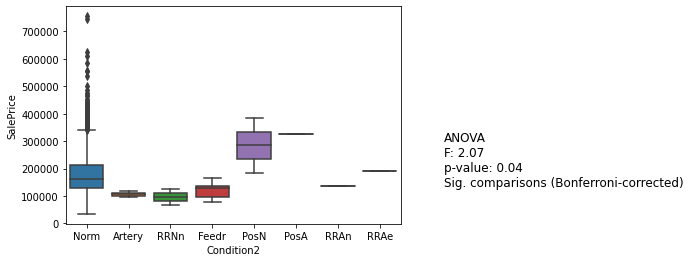

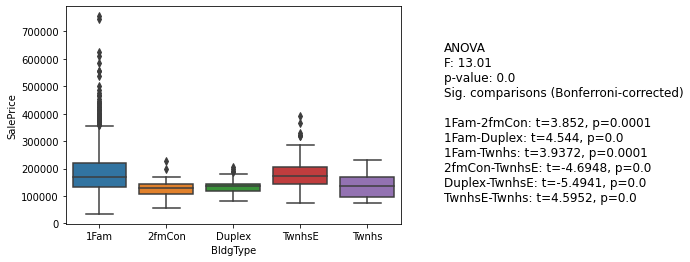

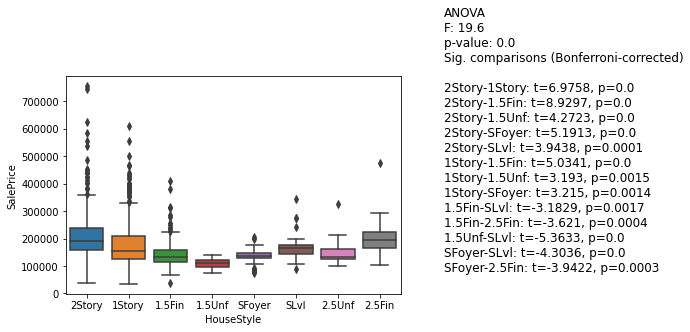

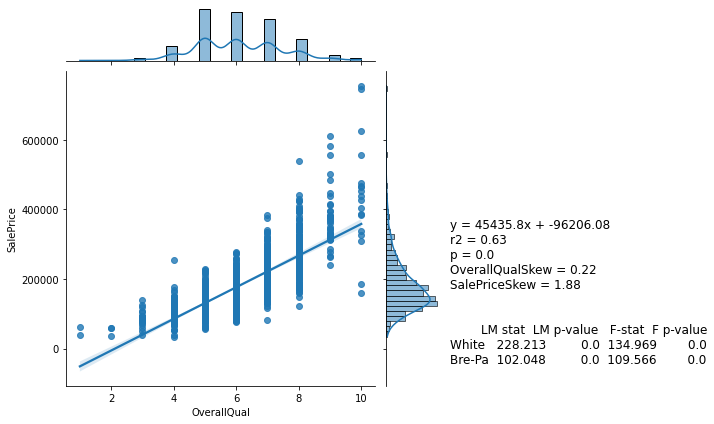

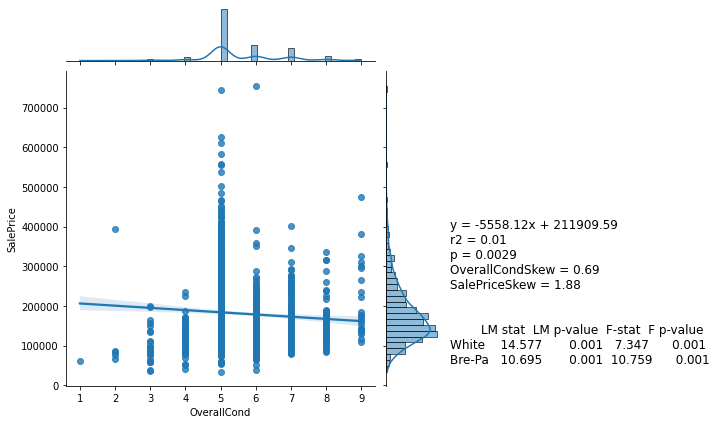

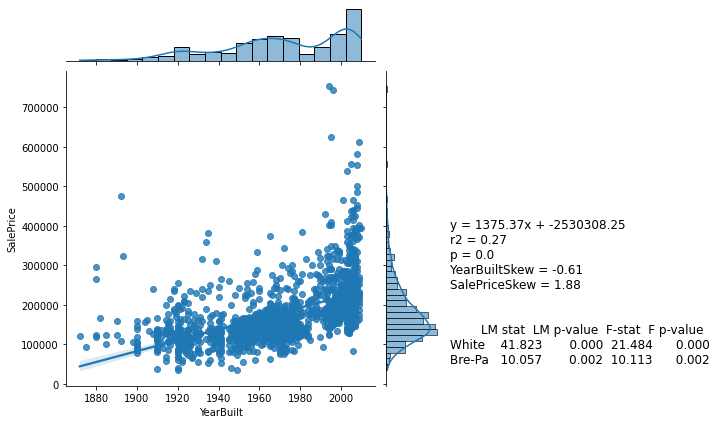

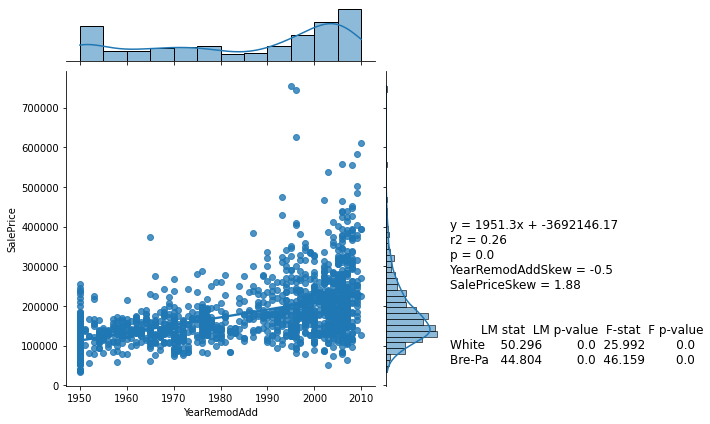

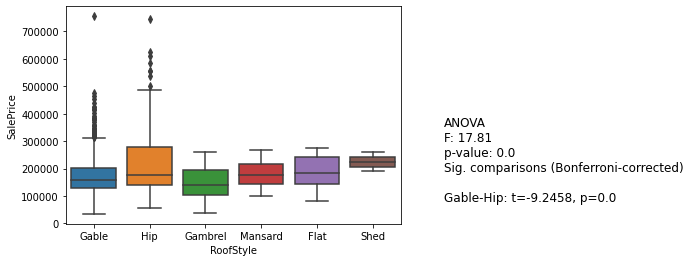

'CompShg' n: 1434; 'Metal' n: 1; no t-test performed
'CompShg' n: 1434; 'Membran' n: 1; no t-test performed
'CompShg' n: 1434; 'Roll' n: 1; no t-test performed
'CompShg' n: 1434; 'ClyTile' n: 1; no t-test performed
'WdShngl' n: 6; 'Metal' n: 1; no t-test performed
'WdShngl' n: 6; 'Membran' n: 1; no t-test performed
'WdShngl' n: 6; 'Roll' n: 1; no t-test performed
'WdShngl' n: 6; 'ClyTile' n: 1; no t-test performed
'Metal' n: 1; 'WdShake' n: 5; no t-test performed
'Metal' n: 1; 'Membran' n: 1; no t-test performed
'Metal' n: 1; 'Tar&Grv' n: 11; no t-test performed
'Metal' n: 1; 'Roll' n: 1; no t-test performed
'Metal' n: 1; 'ClyTile' n: 1; no t-test performed
'WdShake' n: 5; 'Membran' n: 1; no t-test performed
'WdShake' n: 5; 'Roll' n: 1; no t-test performed
'WdShake' n: 5; 'ClyTile' n: 1; no t-test performed
'Membran' n: 1; 'Tar&Grv' n: 11; no t-test performed
'Membran' n: 1; 'Roll' n: 1; no t-test performed
'Membran' n: 1; 'ClyTile' n: 1; no t-test performed
'Tar&Grv' n: 11; 'Roll' n: 

C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


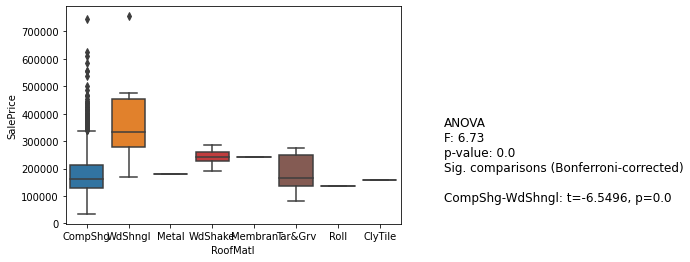

'VinylSd' n: 515; 'AsphShn' n: 1; no t-test performed
'VinylSd' n: 515; 'ImStucc' n: 1; no t-test performed
'VinylSd' n: 515; 'CBlock' n: 1; no t-test performed
'MetalSd' n: 220; 'AsphShn' n: 1; no t-test performed
'MetalSd' n: 220; 'ImStucc' n: 1; no t-test performed
'MetalSd' n: 220; 'CBlock' n: 1; no t-test performed
'Wd Sdng' n: 206; 'AsphShn' n: 1; no t-test performed
'Wd Sdng' n: 206; 'ImStucc' n: 1; no t-test performed
'Wd Sdng' n: 206; 'CBlock' n: 1; no t-test performed
'HdBoard' n: 222; 'AsphShn' n: 1; no t-test performed
'HdBoard' n: 222; 'ImStucc' n: 1; no t-test performed
'HdBoard' n: 222; 'CBlock' n: 1; no t-test performed
'BrkFace' n: 50; 'AsphShn' n: 1; no t-test performed
'BrkFace' n: 50; 'ImStucc' n: 1; no t-test performed
'BrkFace' n: 50; 'CBlock' n: 1; no t-test performed
'WdShing' n: 26; 'AsphShn' n: 1; no t-test performed
'WdShing' n: 26; 'ImStucc' n: 1; no t-test performed
'WdShing' n: 26; 'CBlock' n: 1; no t-test performed
'CemntBd' n: 61; 'AsphShn' n: 1; no t-te

C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


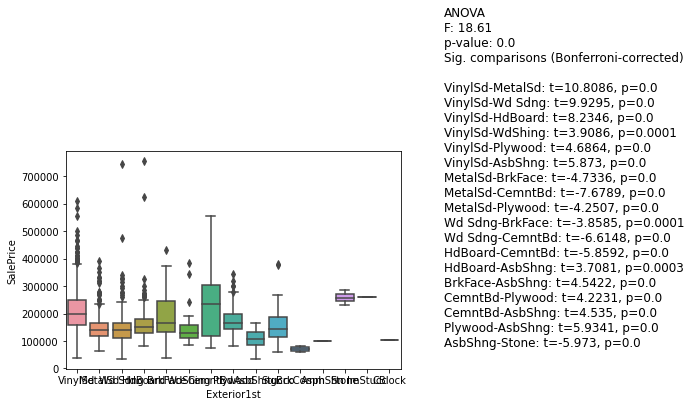

'VinylSd' n: 504; 'Other' n: 1; no t-test performed
'VinylSd' n: 504; 'CBlock' n: 1; no t-test performed
'MetalSd' n: 214; 'Other' n: 1; no t-test performed
'MetalSd' n: 214; 'CBlock' n: 1; no t-test performed
'Wd Shng' n: 38; 'Other' n: 1; no t-test performed
'Wd Shng' n: 38; 'CBlock' n: 1; no t-test performed
'HdBoard' n: 207; 'Other' n: 1; no t-test performed
'HdBoard' n: 207; 'CBlock' n: 1; no t-test performed
'Plywood' n: 142; 'Other' n: 1; no t-test performed
'Plywood' n: 142; 'CBlock' n: 1; no t-test performed
'Wd Sdng' n: 197; 'Other' n: 1; no t-test performed
'Wd Sdng' n: 197; 'CBlock' n: 1; no t-test performed
'CmentBd' n: 60; 'Other' n: 1; no t-test performed
'CmentBd' n: 60; 'CBlock' n: 1; no t-test performed
'BrkFace' n: 25; 'Other' n: 1; no t-test performed
'BrkFace' n: 25; 'CBlock' n: 1; no t-test performed
'Stucco' n: 26; 'Other' n: 1; no t-test performed
'Stucco' n: 26; 'CBlock' n: 1; no t-test performed
'AsbShng' n: 20; 'Other' n: 1; no t-test performed
'AsbShng' n: 2

C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


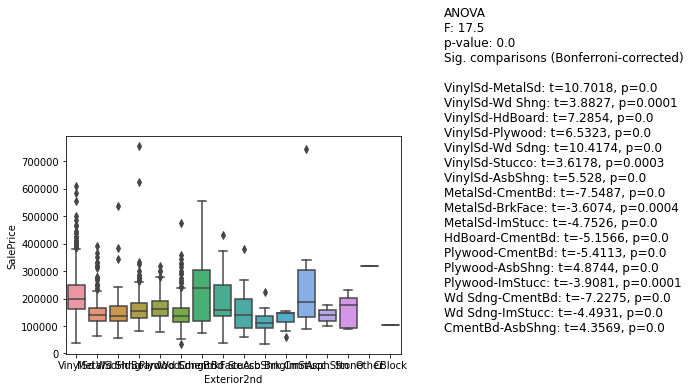

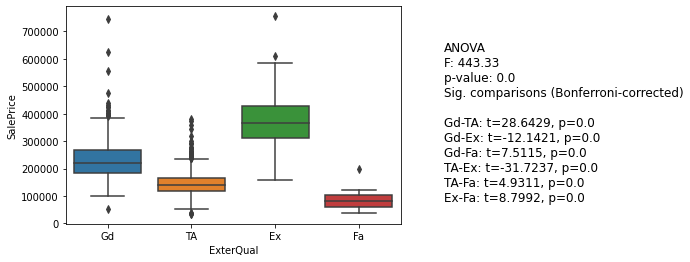

'TA' n: 1282; 'Po' n: 1; no t-test performed
'Gd' n: 146; 'Po' n: 1; no t-test performed
'Fa' n: 28; 'Po' n: 1; no t-test performed
'Po' n: 1; 'Ex' n: 3; no t-test performed


C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


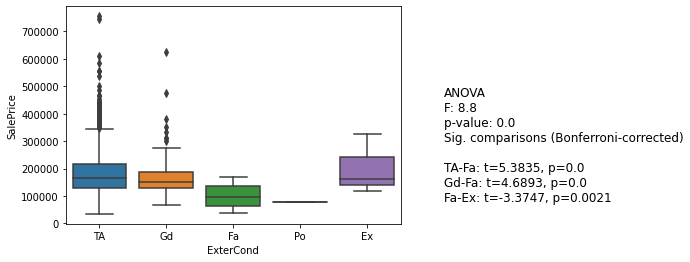

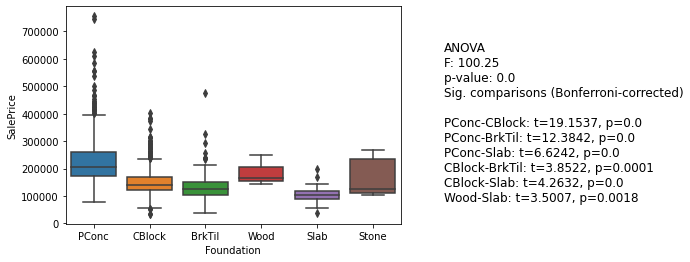

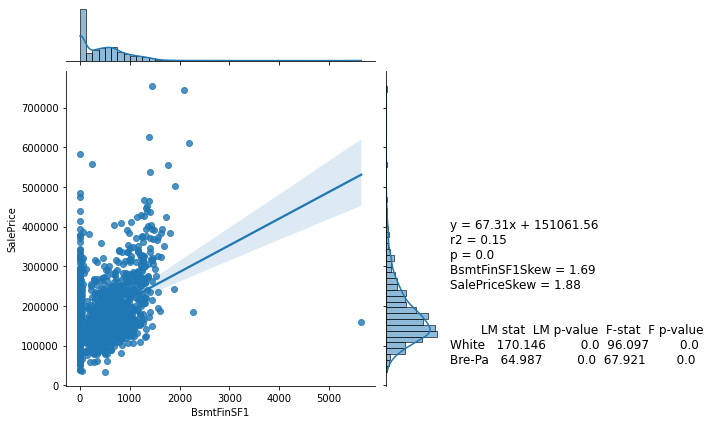

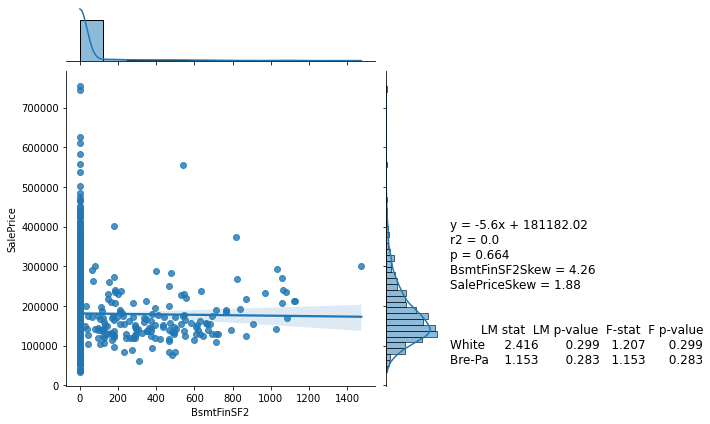

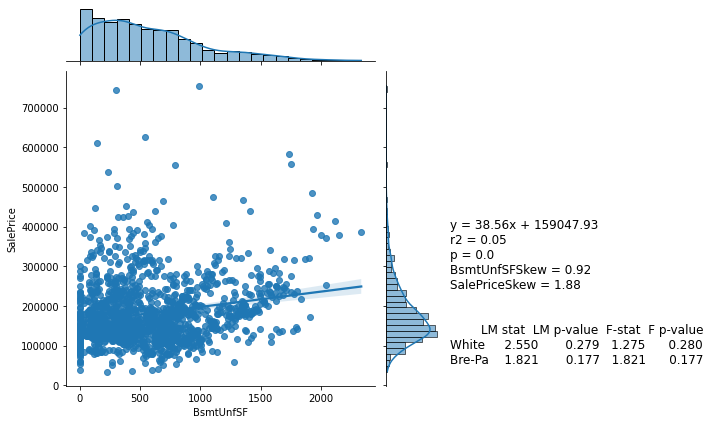

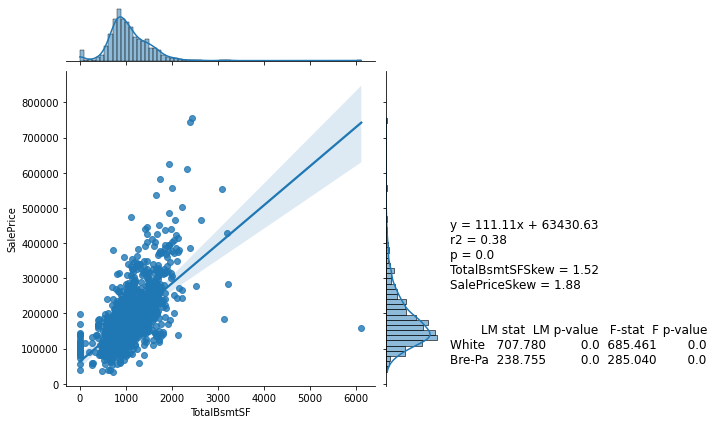

'GasA' n: 1428; 'Floor' n: 1; no t-test performed
'GasW' n: 18; 'Floor' n: 1; no t-test performed
'Grav' n: 7; 'Floor' n: 1; no t-test performed
'Wall' n: 4; 'Floor' n: 1; no t-test performed
'OthW' n: 2; 'Floor' n: 1; no t-test performed


C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


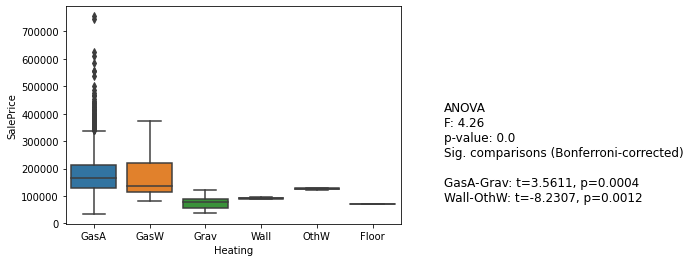

'Ex' n: 741; 'Po' n: 1; no t-test performed
'Gd' n: 241; 'Po' n: 1; no t-test performed
'TA' n: 428; 'Po' n: 1; no t-test performed
'Fa' n: 49; 'Po' n: 1; no t-test performed


C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


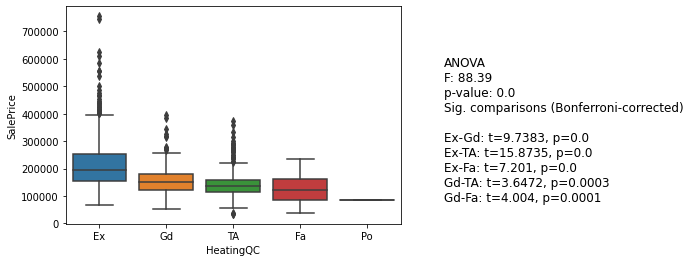

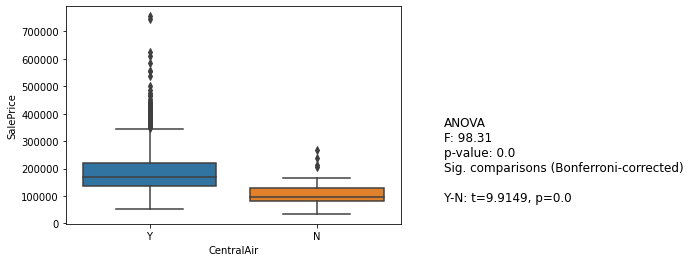

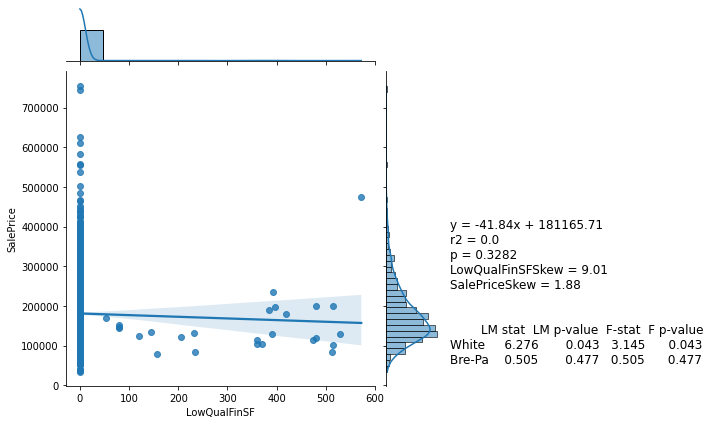

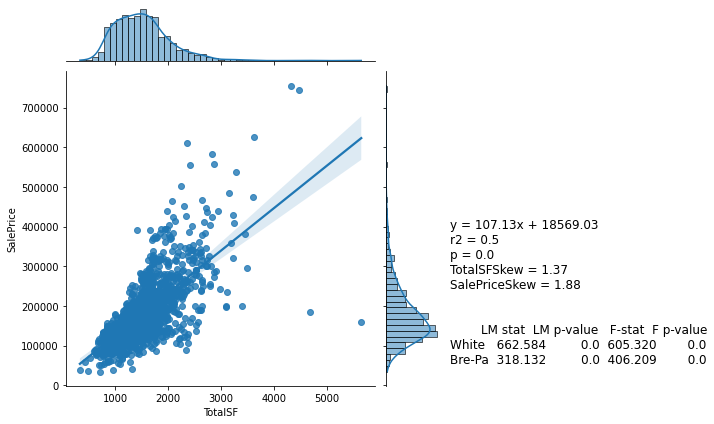

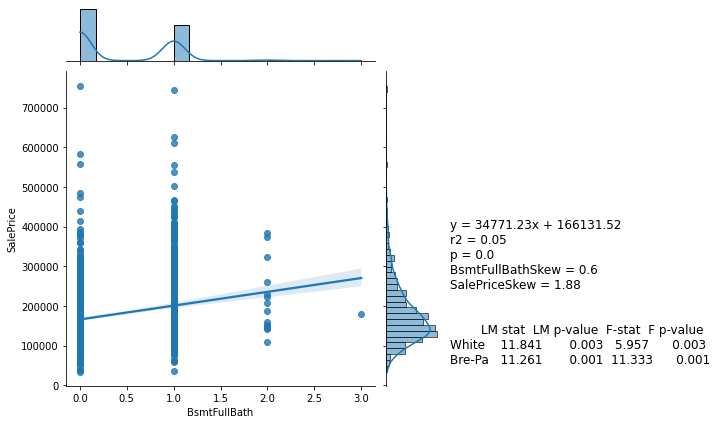

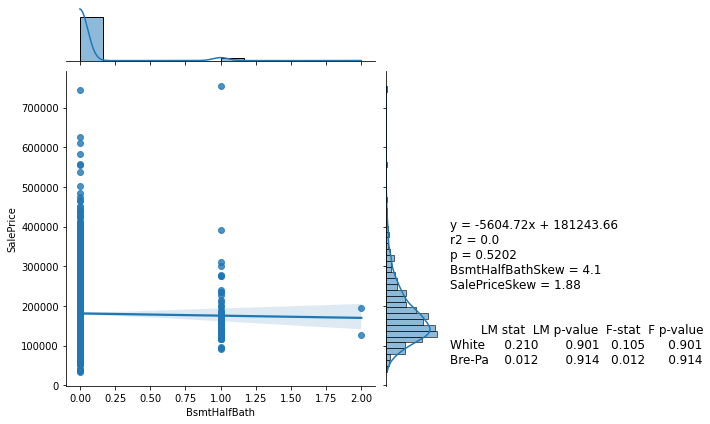

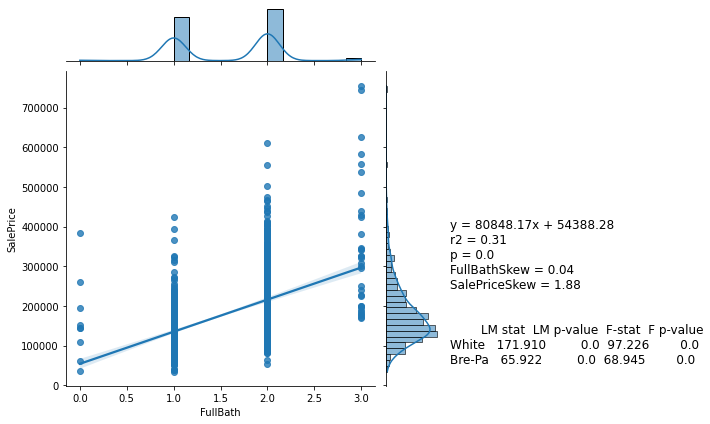

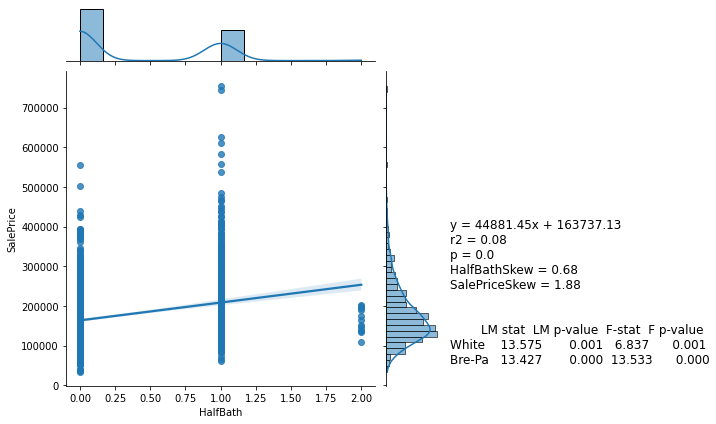

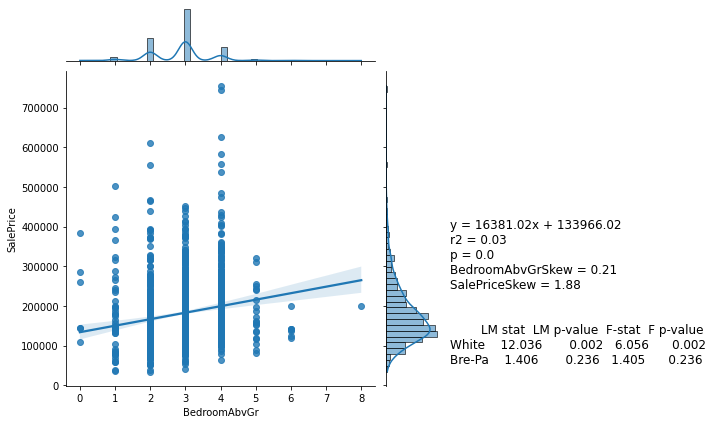

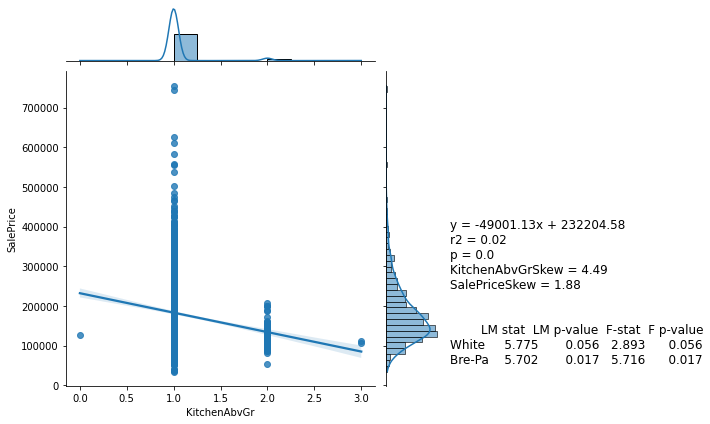

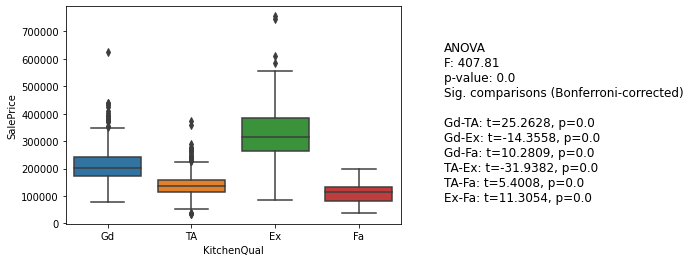

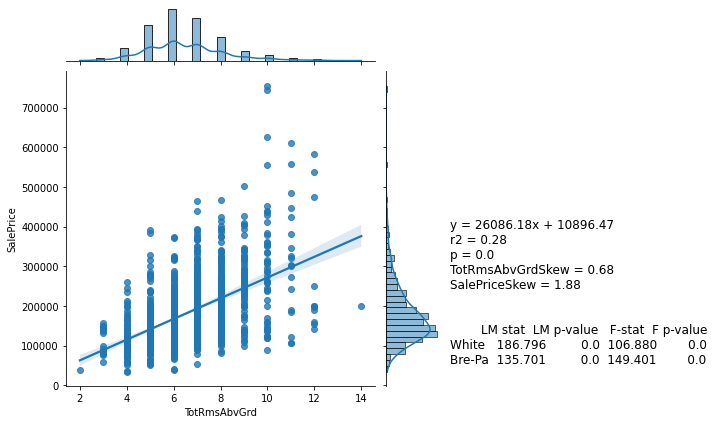

'Typ' n: 1360; 'Sev' n: 1; no t-test performed
'Min1' n: 31; 'Sev' n: 1; no t-test performed
'Maj1' n: 14; 'Sev' n: 1; no t-test performed
'Min2' n: 34; 'Sev' n: 1; no t-test performed
'Mod' n: 15; 'Sev' n: 1; no t-test performed
'Maj2' n: 5; 'Sev' n: 1; no t-test performed


C:\Users\jacks\AppData\Local\Temp\ipykernel_14148\2729612112.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_ind(type_1[y], type_2[y])
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


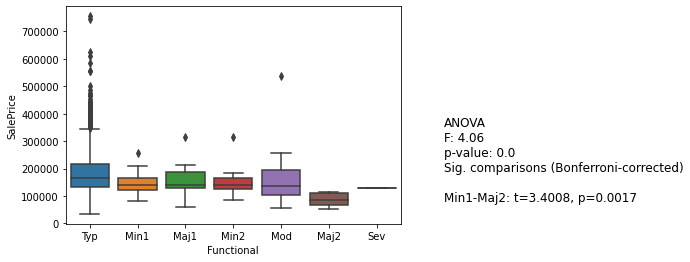

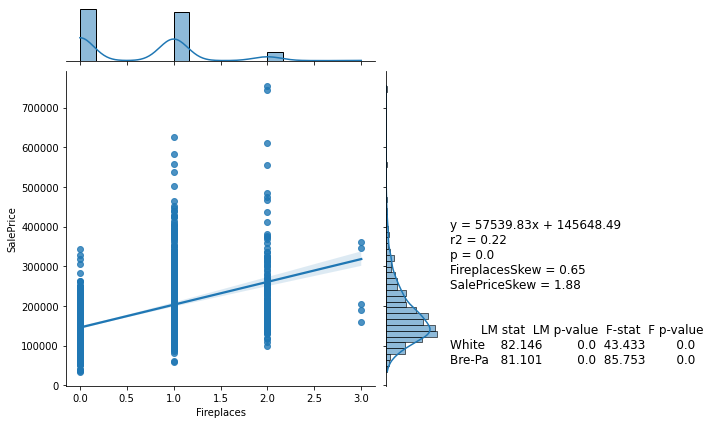

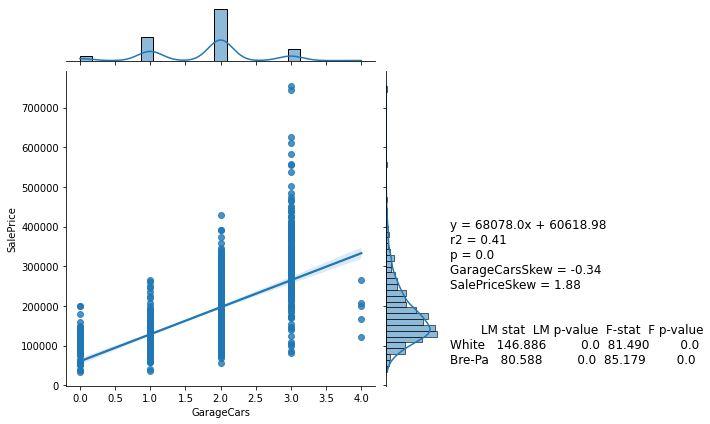

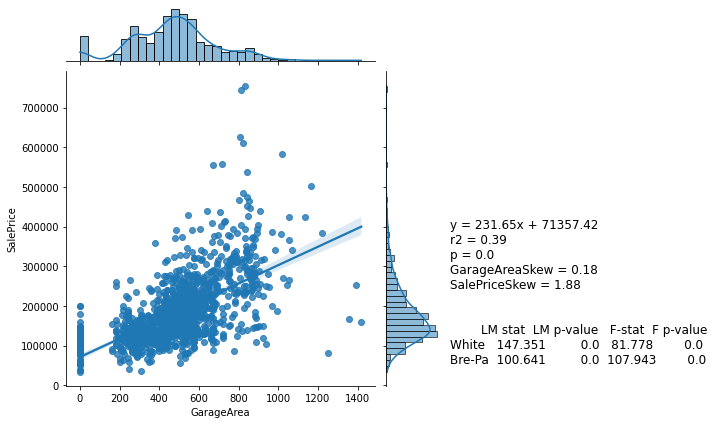

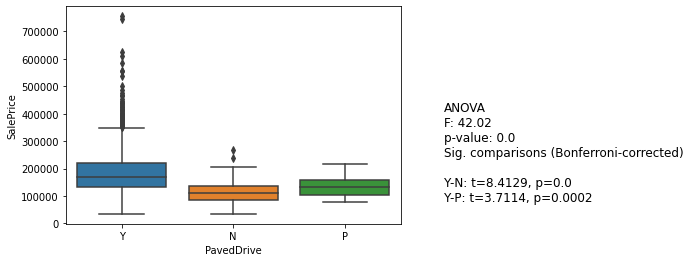

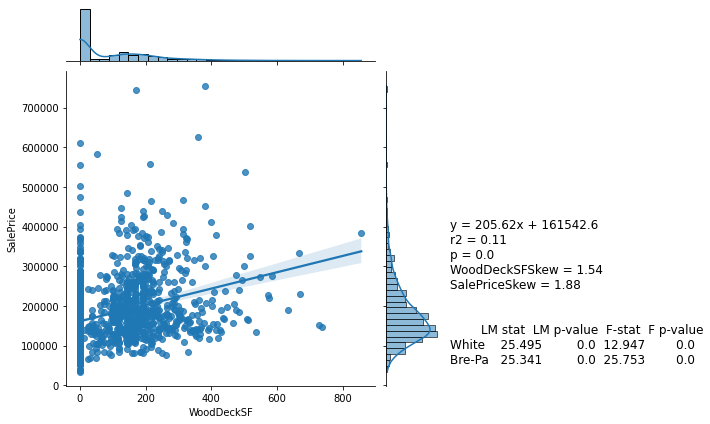

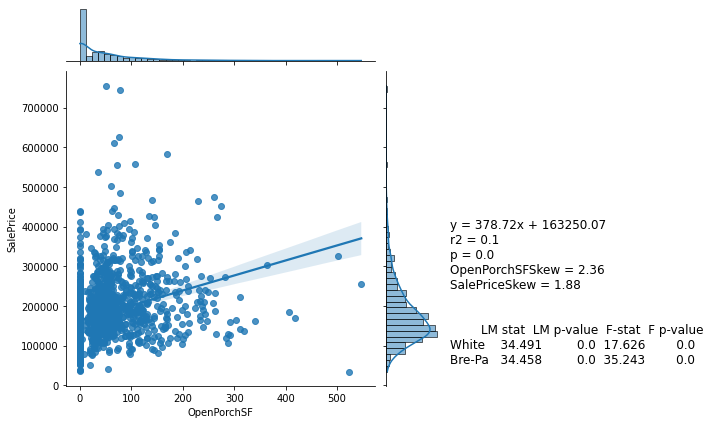

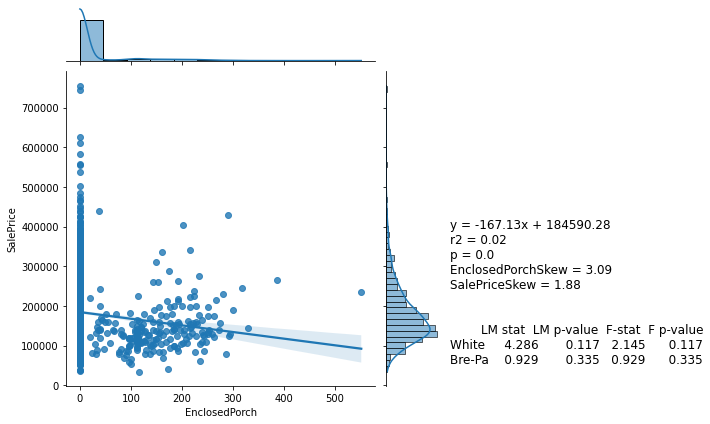

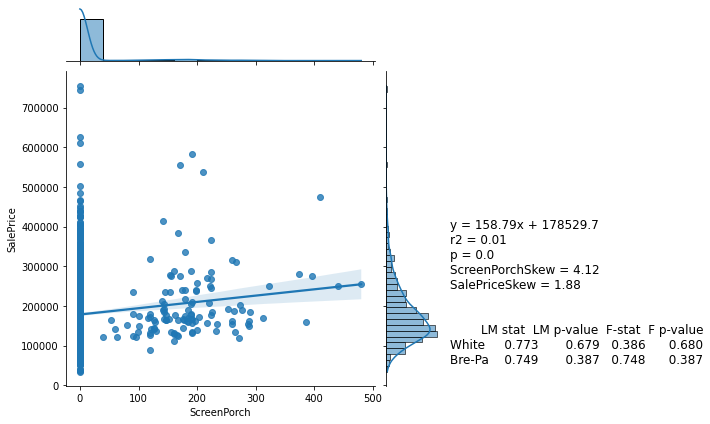

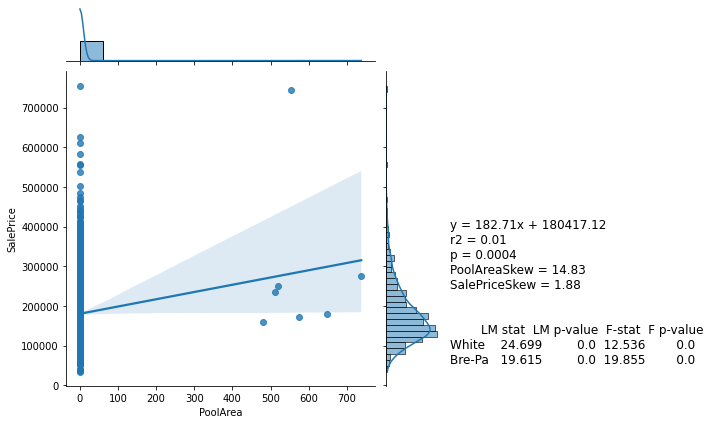

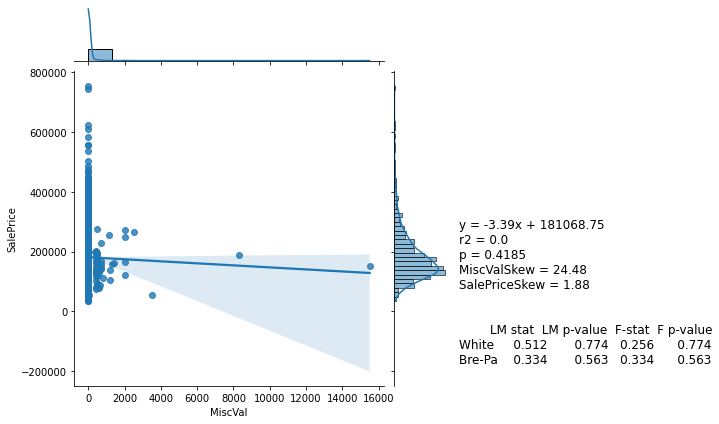

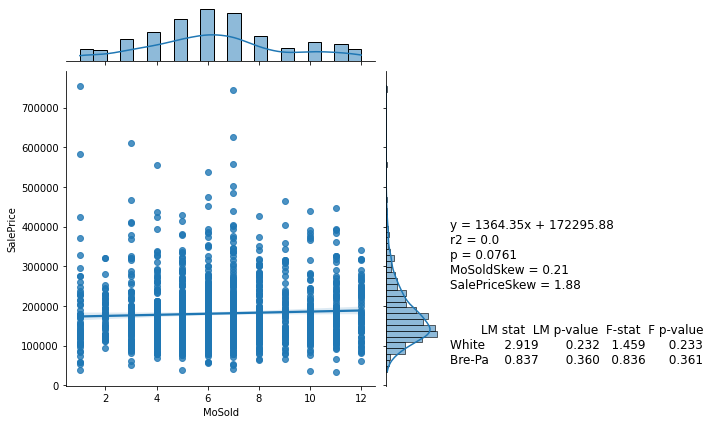

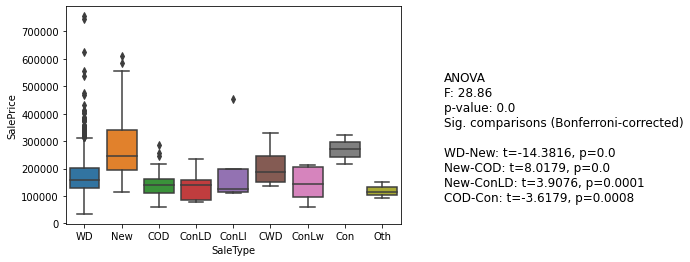

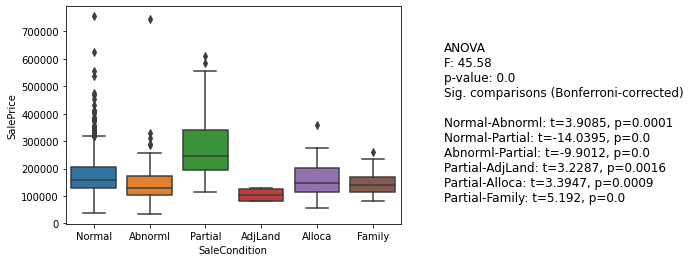

In [18]:
for col in df.drop('SalePrice',axis=1):
    try:
        if df[col].dtype != 'object':
            scatter(df[col], df.SalePrice)
        else:
            box_plot(df, col, 'SalePrice')
    except:
        pass

# 4. Multivariate Statistics (MLR)
* Using the bivariate stats visuals, we have an idea on which data needs cleaning
* First run MLR, then select features

In [76]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

### Function to create dummy features and scale data to compare coefficients

In [77]:
def mlr_prep(df): # Generate dummy features, scale data for coefficient comparison
    
    # Select all column names that are Object type
    cat_cols = df.select_dtypes(include='O').columns
    # Get Dummy codes for those categoricals
    df1 = pd.concat([df, pd.get_dummies(df[cat_cols])], axis=1).drop(cat_cols, axis=1)

    # Scale
    scaler = MinMaxScaler().fit(df1)
    df_minmax = scaler.transform(df1)
    df_minmax = pd.DataFrame(df_minmax, columns=df1.columns)
    
    return df_minmax

In [78]:
df1 = mlr_prep(df)
df1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.000000,0.121575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.000000,0.185788,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.000000,0.231164,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.000000,0.209760,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.997258,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.997944,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.139972,0.110583,0.252140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.998629,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.048724,0.000000,0.375428,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.999315,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.008682,0.698100,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Run Regression

In [79]:
def mlr(df, label): # Run the actual MLR
    y = df[label]
    X = df.drop(label, axis=1).assign(const=1)
    
    results = sm.OLS(y, X).fit()
    return results

In [81]:
results = mlr(df1, 'SalePrice')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     79.31
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:13:11   Log-Likelihood:                 2996.1
No. Observations:                1460   AIC:                            -5618.
Df Residuals:                    1273   BIC:                            -4630.
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                        0.0014      0.003      0.419      0.675      -0.005       0.008
MSSubClass               -0.0020      0.020     -0.100      0.920      -0.042       0.037
LotArea                   0.2092      0.032      6.521      0.000       0.146       0.272
OverallQual               0.1002      0.013      7.874      0.000       0.075       0.125
OverallCond               0.0597      0.010      6.187      0.000       0.041       0.079
YearBuilt                 0.0628      0.014      4.450      0.000       0.035       0.090
YearRemodAdd              0.0088      0.005      1.908      0.057      -0.000       0.018
BsmtFinSF1                0.1564      0.018      8.862      0.000       0.122       0.191
BsmtFinSF2                0.0151      0.009      1.604      0.109      -0.003       0.034
BsmtUnfSF                -0.0070      0.008     -0.892      0.372      -0.022       0.008
TotalBsmtSF               0.1455      0.018      7.869      0.000       0.109       0.182
1stFlrSF                  0.1753      0.020      8.817      0.000       0.136       0.214
2ndFlrSF                  0.1261      0.014      9.316      0.000       0.100       0.153
LowQualFinSF             -0.0010      0.015     -0.071      0.944      -0.030       0.028
TotalSF                   0.1929      0.016     12.369      0.000       0.162       0.223
BsmtFullBath              0.0064      0.008      0.785      0.433      -0.010       0.022
BsmtHalfBath              0.0011      0.009      0.129      0.897      -0.016       0.018
FullBath                  0.0105      0.009      1.127      0.260      -0.008       0.029
HalfBath                 -0.0005      0.006     -0.080      0.936      -0.012       0.011
BedroomAbvGr             -0.0612      0.015     -3.994      0.000      -0.091      -0.031
KitchenAbvGr             -0.0658      0.024     -2.760      0.006      -0.113      -0.019
TotRmsAbvGrd              0.0225      0.016      1.384      0.167      -0.009       0.054
Fireplaces                0.0116      0.006      2.025      0.043       0.000       0.023
GarageCars                0.0239      0.012      1.937      0.053      -0.000       0.048
GarageArea                0.0257      0.015      1.712      0.087      -0.004       0.055
WoodDeckSF                0.0163      0.007      2.298      0.022       0.002       0.030
OpenPorchSF               0.0092      0.009      1.029      0.303      -0.008       0.027
EnclosedPorch             0.0042      0.010      0.426      0.670      -0.015       0.023
3SsnPorch                 0.0173      0.016      1.058      0.290      -0.015       0.049
ScreenPorch               0.0247      0.008      2.948      0.003       0.008       0.041
PoolArea                  0.0727      0.019      3.876      0.000       0.036       0.110
MiscVal                

### Next step: Step-wise backward elimination
R-squared is good (0.921) but the Adj. R-squared is lower. The model is penalized for having more variables. This indicates that there are alot of variables that aren't doing anything and can be removed


**Backward Elimination** is a technique used in multiple linear regression to select the most important variables by removing the least significant variables one at a time. The idea is to start with all the variables in the model, and then remove the variable that has the highest p-value (a measure of the probability that the variable's coefficient is not different from zero) until all remaining variables have a p-value below a certain threshold (usually 0.05).

*but it has some limitations, such as being sensitive to the order of the variables in the model and not considering the possible interactions between variables. Therefore, it's always good practice to use other techniques and models to validate the results obtained by backward elimination.*



In [82]:
# Sort the features by t and p values 
def mlr_feature_df(results):
    df_features = pd.DataFrame({'coef': results.params, 't':abs(results.tvalues), 'p':results.pvalues})
    df_features.drop('const', inplace=True)
    df_features = df_features.sort_values(by=['t', 'p'])
    return df_features

In [84]:
mlr_feature_df(results).head()

,coef,t,p
Utilities_AllPub,-0.000077,0.004408,0.996484
SaleType_Oth,-0.000150,0.008005,0.993614
Exterior1st_BrkComm,0.000312,0.009229,0.992638
SaleCondition_Normal,0.000057,0.010359,0.991737
Exterior1st_AsphShn,0.000799,0.019181,0.984699


# 5. Step-wise Backward Elimination
**Automate the backward elimination process using a while loop**
* Use a loop to keep removing the variable with the highest p-value and re-fitting the model until all remaining variables have a p-value below the threshold (0.05).
* Automate the MLR to find best combination of R-squared, not having too many features to overfit
* Then see the most important features and pick top features for MLR

In [85]:
# Calculate fit statistics, then loop to create record entry for modelling results table

def mlr_fit(results, actual, roundto=10): 
    # Generate feature table with t-stat and p-value sorted by highest to lowest
    df_features = mlr_feature_df(results) 
    
    # Calculate residuals
    residuals = np.array(actual) - np.array(results.fittedvalues)
    # RMSE
    rmse = np.sqrt(sum((residuals**2)) / len(actual))
    # MAE
    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))

    fit_stats = [round(results.rsquared, roundto),
            round(results.rsquared_adj, roundto),
            round(results.rsquared - results.rsquared_adj, roundto),
            round(rmse, roundto),
            round(mae, roundto),
            [df_features.index.values]]
    
    return fit_stats

### MLR Step-wise process

In [92]:
from tqdm import tqdm

In [93]:
def mlr_step(df, label, n=2):
    
    # Create empty model table
    df_models = pd.DataFrame(columns=['R2', 'R2a', 'diff', 'RMSE', 'MAE', 'features'])
    
    # Prep data (dummy & scaling)
    df1 = mlr_prep(df)
    
    # Run MLR
    results = mlr(df1, label)
    
    # Generate fit stats
    df_models.loc[str(len(results.params))] = mlr_fit(results, df1[label], 10)

    # Sort by t-stat and p-value
    df_features = mlr_feature_df(results)
    
    
    ### Step through ###
    for i in tqdm(range(len(results.params)), desc="Running backward elimination"):
        df1 = df1.drop(df_features.index[0], axis=1) # Drop the least effective feature
        results = mlr(df1, label) # Re-run MLR
        df_features = mlr_feature_df(results) # Re-sort t and p
        df_models.loc[str(len(results.params))] = mlr_fit(results, df1[label], 10) # Store statistics
        if len(results.params) <= n:
            break
    return df_models    

In [94]:
df_models = mlr_step(df, 'SalePrice')

Running backward elimination:  99%|█████████████████████████████████████████████████▎| 214/217 [00:14<00:00, 15.19it/s]


In [95]:
df_models.index = df_models.index.astype(int)
df_models

,R2,R2a,diff,RMSE,MAE,features
217,0.920562,0.908956,0.011607,0.031083,0.020160,"[[Utilities_AllPub, SaleType_Oth, Exterior1st_..."
216,0.920562,0.908956,0.011607,0.031083,0.020160,"[[SaleType_Oth, Exterior1st_BrkComm, SaleCondi..."
215,0.920562,0.908956,0.011607,0.031083,0.020160,"[[Exterior1st_BrkComm, SaleCondition_Normal, E..."
214,0.920562,0.908956,0.011607,0.031083,0.020160,"[[Exterior1st_AsphShn, SaleCondition_Normal, E..."
213,0.920562,0.909027,0.011535,0.031083,0.020160,"[[SaleCondition_Normal, Exterior2nd_AsphShn, E..."
...,...,...,...,...,...,...
6,0.793131,0.792420,0.000711,0.050160,0.033964,"[[BsmtFinSF1, RoofMatl_ClyTile, 2ndFlrSF, 1stF..."
5,0.764575,0.763927,0.000647,0.053510,0.036848,"[[RoofMatl_ClyTile, 2ndFlrSF, 1stFlrSF, Overal..."
4,0.739757,0.739221,0.000536,0.056260,0.037151,"[[2ndFlrSF, 1stFlrSF, OverallQual]]"
3,0.693574,0.693153,0.000421,0.061048,0.042177,"[[1stFlrSF, OverallQual]]"


* Removing one variable will effect the coefficient of all other variables
* Thats why step process is needed

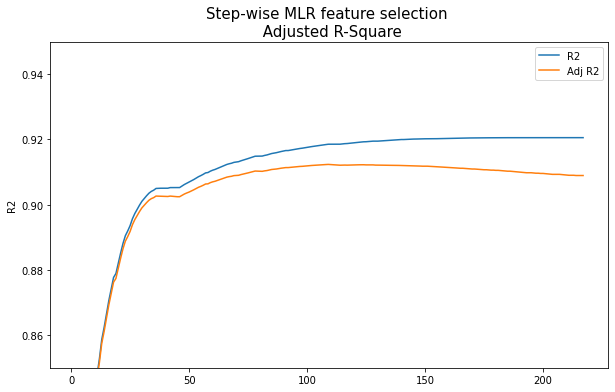

In [96]:
plt.figure(figsize=(10,6))

plt.title('Step-wise MLR feature selection \n Adjusted R-Square', fontsize=15)
sns.lineplot(x=df_models.index, y=df_models.R2, label='R2')
sns.lineplot(x=df_models.index, y=df_models.R2a, label='Adj R2')
plt.legend()
plt.ylim(.85,.95);

### Recommend optimal number of features
* As variables are dropped in order of least effective, the R2 goes down
* But Adjusted R-Square can go up
* Eventually, the curves get close together
* About 10-25 variables is where the curves are close. This may be a good number of variables to use for prediction model

In [97]:
df_models.loc[25:10]

,R2,R2a,diff,RMSE,MAE,features
25,0.893577,0.891797,0.001780,0.035977,0.023989,"[[BldgType_Twnhs, BldgType_TwnhsE, Functional_..."
24,0.891956,0.890226,0.001731,0.036250,0.024291,"[[BldgType_TwnhsE, Functional_Typ, Neighborhoo..."
23,0.890505,0.888829,0.001676,0.036493,0.024449,"[[Functional_Typ, Neighborhood_Crawfor, RoofMa..."
22,0.888143,0.886510,0.001634,0.036884,0.024788,"[[Neighborhood_Crawfor, ExterQual_Gd, RoofMatl..."
21,0.885203,0.883607,0.001596,0.037366,0.025201,"[[RoofMatl_WdShngl, ExterQual_Gd, Neighborhood..."
20,0.882108,0.880553,0.001556,0.037866,0.025380,"[[ExterQual_Gd, Neighborhood_StoneBr, Neighbor..."
19,0.878910,0.877398,0.001513,0.038376,0.025612,"[[ExterQual_TA, Neighborhood_StoneBr, GarageAr..."
18,0.877702,0.876260,0.001442,0.038568,0.025801,"[[Neighborhood_StoneBr, GarageArea, KitchenAbv..."
17,0.874167,0.872772,0.001395,0.039121,0.025972,"[[GarageArea, Neighborhood_NridgHt, KitchenAbv..."
16,0.870639,0.869296,0.001344,0.039665,0.026469,"[[KitchenAbvGr, SaleType_COD, Neighborhood_Nri..."


### Dropping non-normal features

* Recommend 20 number of features
* After that, based on the normality and hetero issues, more features can be dropped .

In [98]:
feature_list = df_models['features'].loc[20][0].tolist()

In [99]:
ft_skew = unistats(df1)[['Skew','Kurt']].loc[unistats(df1).index.isin(feature_list)].sort_values('Skew')
ft_skew

,Skew,Kurt
SaleType_WD,-2.174122,2.730544
YearBuilt,-0.613461,-0.439552
ExterQual_TA,-0.497359,-1.755040
GarageArea,0.179981,0.917067
OverallQual,0.216944,0.096293
OverallCond,0.693067,1.106413
ExterQual_Gd,0.703475,-1.507189
2ndFlrSF,0.813030,-0.553464
1stFlrSF,1.376757,5.745841
BsmtFinSF1,1.685503,11.118236


In [103]:
fts = ft_skew.loc[(ft_skew['Skew']>=-1) & (ft_skew['Skew']<=1),:].index.values

# What are the key drivers of housing price?

In [104]:
fts

array(['YearBuilt', 'ExterQual_TA', 'GarageArea', 'OverallQual',
       'OverallCond', 'ExterQual_Gd', '2ndFlrSF'], dtype=object)